## Breast cancer prediction 
1. Load the features selected by correlation
2. Exploratory data analysis and data scaling
3. Split the dataset into train and test datasets
4. Model building and selecting the model with highest evaluation metric
5. Save the finalized model

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import scipy.signal
from scipy import signal
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
#from ydata_profiling import ProfileReport
import seaborn as sns
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

import joblib

In [20]:
#Load the dataset from sklearn
from sklearn.datasets import load_breast_cancer

In [21]:
cancer=load_breast_cancer()

In [22]:
#Read training datasets
df=pd.DataFrame(cancer.data, columns=cancer.feature_names)

#### Here the target column has 2 values Malignant and Benign tumor
For computation purpose,<br>
1: benign tumor = 63%<br>
0: malignant tumor= 37%

In [28]:
df['target']=cancer.target

In [31]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [52]:
#Split the dataframe
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_target = pd.DataFrame(cancer['target'],columns=['target'])

In [49]:
df_feat.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
dtype: int64

### Exploratory data analysis
#### a. Check for missing values
This cell will check if any null values are present in the dataset and return features with null values.

In [10]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
if any(df[features_with_na].isnull().any()):
    for feature in features_with_na:
        print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')
else:
    print("No missing values in the selected features.")

No missing values in the selected features.


<AxesSubplot:>

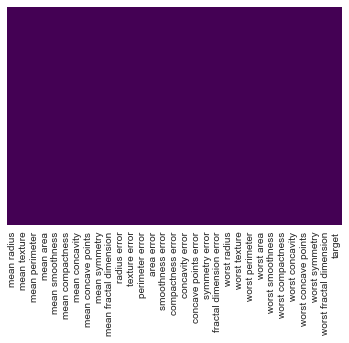

In [40]:
# Heatmap to see where visualize the missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### b. Check if the dataset is balanced

<AxesSubplot:xlabel='target', ylabel='count'>

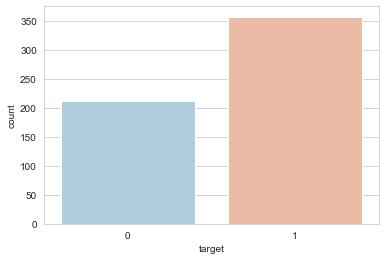

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df_target,palette='RdBu_r')

#### c. Plot histogram of each feature to check distribution of each feature

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>],
       [<AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:tit

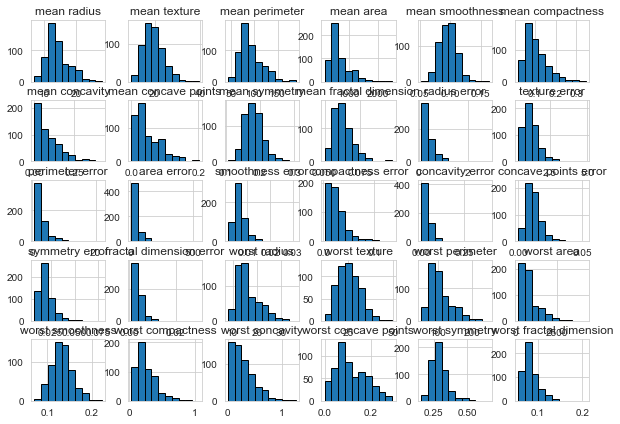

In [109]:
#Define format for subplots
fig, axis = plt.subplots(5, 6, figsize=(10,7))

#create histogram for each column in DataFrame
df_feat.hist(ax=axis, edgecolor='black', grid=True)

#### d. Create Correlation matrix with heatmap to check correlation between features and target variable

In [57]:
#Correlation with respect to target variable
correlation_matrix =df.corr()

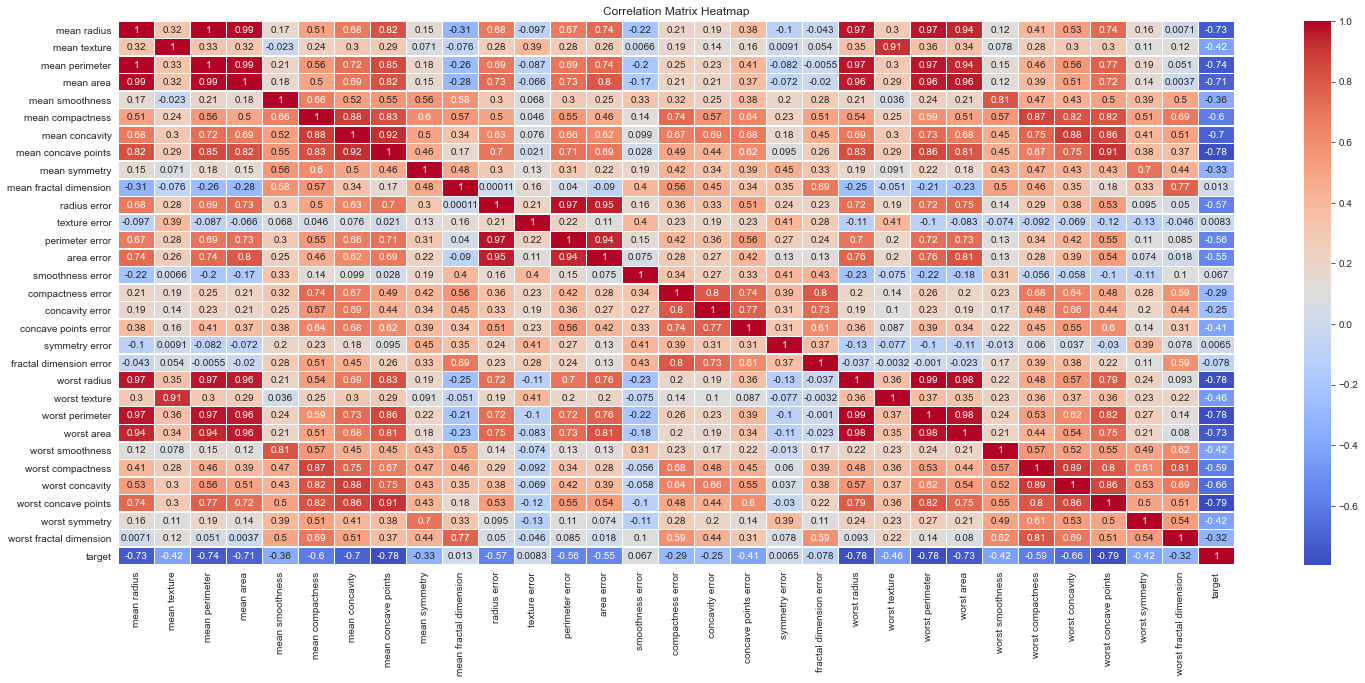

In [58]:
plt.figure(figsize=(25,10))
# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
#Get feature correlated with each other
def correlation(dataset,threshold):
    col_corr=set() #Set of all names of correlated columns
    #row_corr=set() #Set of all names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]  #Getting name of the column
                col_corr.add(colname)
    return col_corr

In [62]:
corr_features=correlation(df_feat,0.7)
len(set(corr_features))

20

If the performance of the classifers is low, the correlated features can be dropped to improve prediction by the classifers.

In [114]:
#Correlation of all the variables with the target variable
df_corr = df.corr()['target'].abs().sort_values(ascending=False)
df_corr

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

#### e. Analysis of features with high correlation with the target variable using joint plot and scatterplot

In [110]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [120]:
highly_correlted_features=df[['worst perimeter','mean concave points','worst radius',
                                   'mean perimeter','worst area','mean radius','mean area',
                                   'mean concavity','worst concavity','target']]                                

<Figure size 720x576 with 0 Axes>

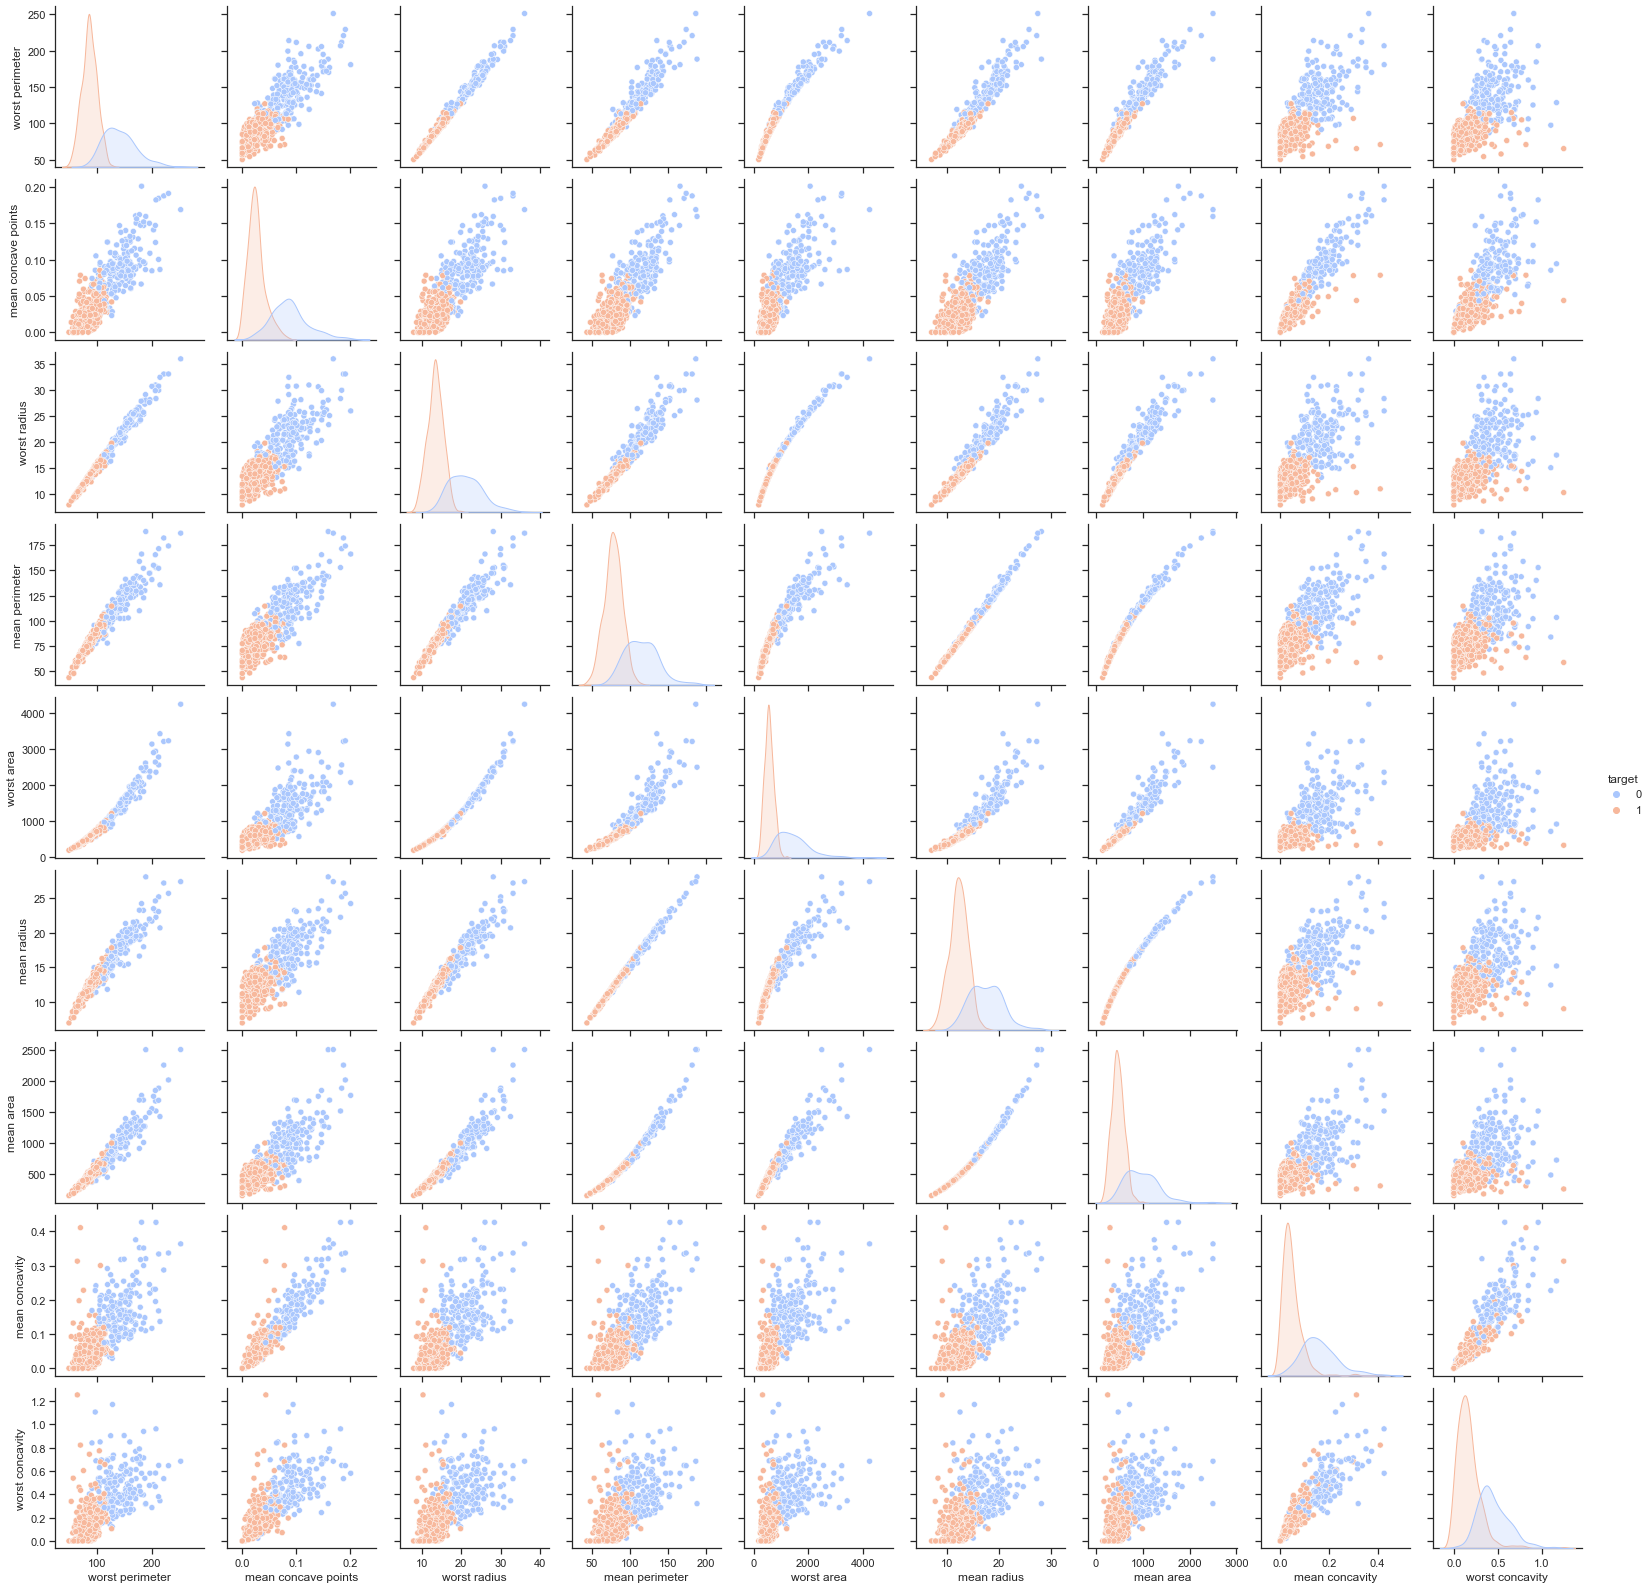

In [122]:
sns.set(style="ticks")
plt.figure(figsize=(10, 8))

sns.pairplot(highly_correlted_features,hue='target',palette='coolwarm')
# Increase the figure size

plt.show()

#### Jointplot used to explore the correlation between features with respect to the target.

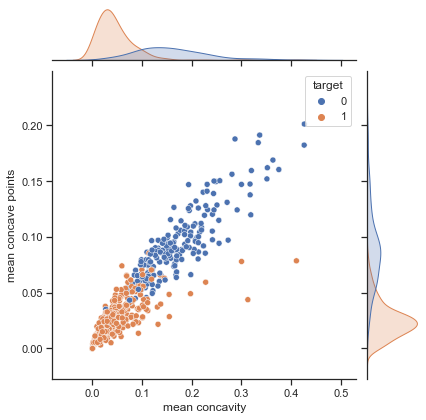

In [140]:
sns.jointplot(x='mean concavity',y='mean concave points',hue='target',data=df,palette='deep') 

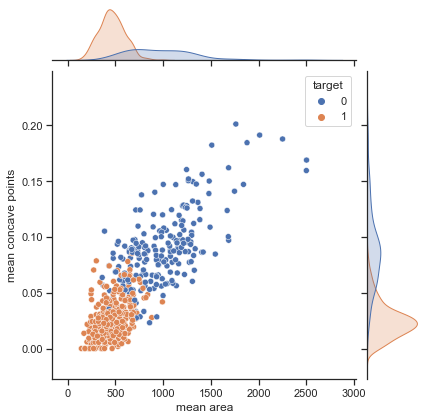

In [129]:
sns.jointplot(x='mean area',y='mean concave points',hue='target',data=df) 

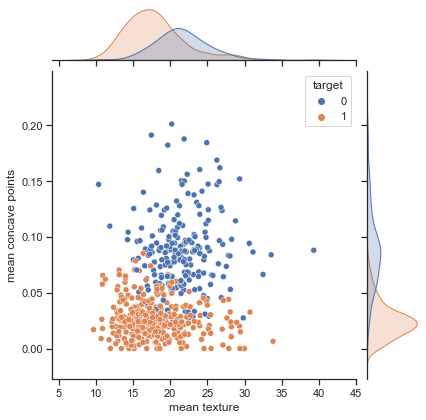

In [130]:
sns.jointplot(x='mean texture',y='mean concave points',hue='target',data=df) 

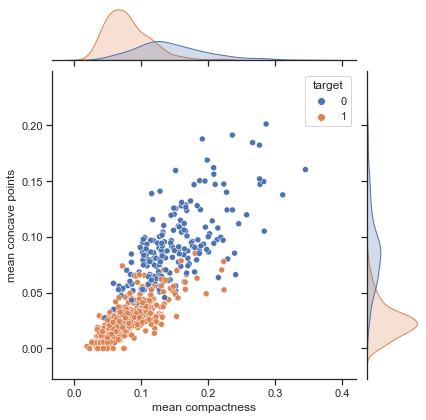

In [131]:
sns.jointplot(x='mean compactness',y='mean concave points',hue='target',data=df) 

### Scaling the features using pipeline
1. If the datset follows normal distribution, use Standardization. <br>
   Standardization, on the other hand, rescales the data to have a mean of 0 and a standard deviation of 1. 

2. The given dataset follows a normal distribution,use Min-Max Scaler. <br>
   Normalization, also known as Min-Max scaling, transforms the data linearly to a specified range,   typically between 0 and 1. 
 

In [69]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [141]:
X = preprocessor.fit_transform(X)
X.shape

(569, 30)

### Split training and testing dataset

In [98]:
X_train, X_test, y_train, y_test =train_test_split(X,np.ravel(y),test_size=0.40,random_state=52)

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(398, 30) (398,)
(171, 30) (171,)


### Model evaluation

In [81]:
def evaluate_model_classification(true, predicted):
    accuracy=accuracy_score(true, predicted)
    F1_score=f1_score(true, predicted)
    Confusion_matrix=confusion_matrix(true, predicted)
    report=classification_report(true, predicted)
    return accuracy, F1_score, report

In [142]:
#Use these evaluation metrics for classification
models = {
    "Logistic Regression":LogisticRegression(),
    "Linear Discriminant Analysis" :LinearDiscriminantAnalysis(),
    "Support_vector Machine": svm.SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifer":  RandomForestClassifier(), 
    
}
model_list = []
F1_list =[]
accuracy_list=[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy,model_train_F1_score,model_train_report = evaluate_model_classification(y_train, y_train_pred)

    model_test_accuracy,model_test_F1_score,model_test_report= evaluate_model_classification(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_F1_score))
    print("".format(print(model_train_report)))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_F1_score))
    print("".format(print(model_test_report)))
    
    F1_list.append(model_test_F1_score)
    accuracy_list.append(model_test_accuracy)
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.9824
- F1 Score: 0.9860
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       127
           1       0.98      0.99      0.99       214

    accuracy                           0.98       341
   macro avg       0.98      0.98      0.98       341
weighted avg       0.98      0.98      0.98       341


----------------------------------
Model performance for Test set
- Accuracy: 0.9868
- F1 Score: 0.9895
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        85
           1       0.99      0.99      0.99       143

    accuracy                           0.99       228
   macro avg       0.98      0.99      0.99       228
weighted avg       0.99      0.99      0.99       228




Linear Discriminant Analysis
Model performance for Training set
- Accuracy: 0.9560
- F1 Score: 0.9658
              precision    recall  f1-score

In [83]:
pd.DataFrame(list(zip(model_list, accuracy_list,F1_list)), columns=['Model Name', 'Accuracy','F1_Score']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy,F1_Score
0,Logistic Regression,0.982456,0.985915
2,Support_vector Machine,0.982456,0.986047
1,Linear Discriminant Analysis,0.976608,0.981651
4,Random Forest Classifer,0.970760,0.976959
3,Decision Tree,0.912281,0.930233


###  Select the best model 
1. Train the selected model and get metric values
2. If the metric values are as per expectation, get hyperparameters.
3. Save the trained model

In [84]:
model=LogisticRegression()

In [85]:
model.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred=model.predict(X_test)

In [87]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,y_pred)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,y_pred)
print('Mean_squared_error :',mse)

Accuracy : 0.9824561403508771
F1_score : 0.9859154929577464
Mean_squared_error : 0.017543859649122806


In [88]:
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.99      0.98      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [90]:
# Get hyperparameter values
hyperparameters = model.get_params()
print("Hyperparameters:", hyperparameters)

Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Download the model

In [94]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [95]:
# Save hyperparameters to a file (can use a dictionary)
hyperparameters = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
joblib.dump(hyperparameters, 'hyperparameters.joblib')

['hyperparameters.joblib']

In [96]:
# Load the trained model
loaded_model = joblib.load('trained_model.joblib')

In [97]:
# Load hyperparameters
loaded_hyperparameters = joblib.load('hyperparameters.joblib')

### Validate the saved model 
1. Use the saved model to predict the values on test data or validation data of different sizes

In [101]:
## Test dataset size changed to 40% of the total dataset
predictions=loaded_model.predict(X_test)

In [102]:
accuracy=accuracy_score(y_test,predictions)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,predictions)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,predictions)
print('Mean_squared_error :',mse)

Accuracy : 0.9868421052631579
F1_score : 0.9894736842105264
Mean_squared_error : 0.013157894736842105


Text(34.0, 0.5, 'True')

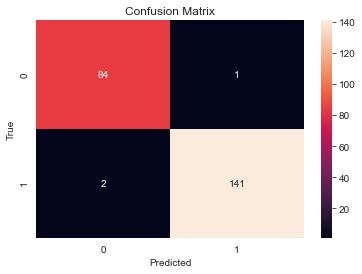

In [104]:
matrix = confusion_matrix(y_test,predictions)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')